In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# 모든 사용 가능한 GPU list 보기
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11040168473708628018
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4152360960
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6568678160738293544
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [3]:
print(tf.config.list_physical_devices('GPU'))
print(len(tf.config.list_physical_devices('GPU')))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1


In [4]:
# XOR 데이터
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

print(x[0].shape, y[0].shape)

(2,) (1,)


In [5]:
# model 1 : 2 layers with 2 units
from multiprocessing.dummy import active_children
from re import L


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=2, activation='sigmoid')
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model_1.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0815
Epoch 2/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 3/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0813
Epoch 4/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0812
Epoch 5/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0810
Epoch 7/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0809
Epoch 8/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0808
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0807
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0805
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.0803
Epoch 13/2000
4/4 [==============================

In [15]:
model_1.predict(x)

1/1 [==============================] - 0s 24ms/step


array([[0.1429985 , 0.12924187],
       [0.8844188 , 0.8952128 ],
       [0.88438606, 0.8951811 ],
       [0.12677604, 0.1151922 ]], dtype=float32)

In [16]:
for weight in model_1.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 6.93307  , -4.2733603],
       [ 6.9282637, -4.273108 ]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([-3.0146656,  6.3674746], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[4.8206086, 5.0894113],
       [4.96959  , 5.2643604]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-7.116293, -7.532128], dtype=float32)>


##### 2-Layer XOR Network의 정보 시각화

In [22]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "../../fonts/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

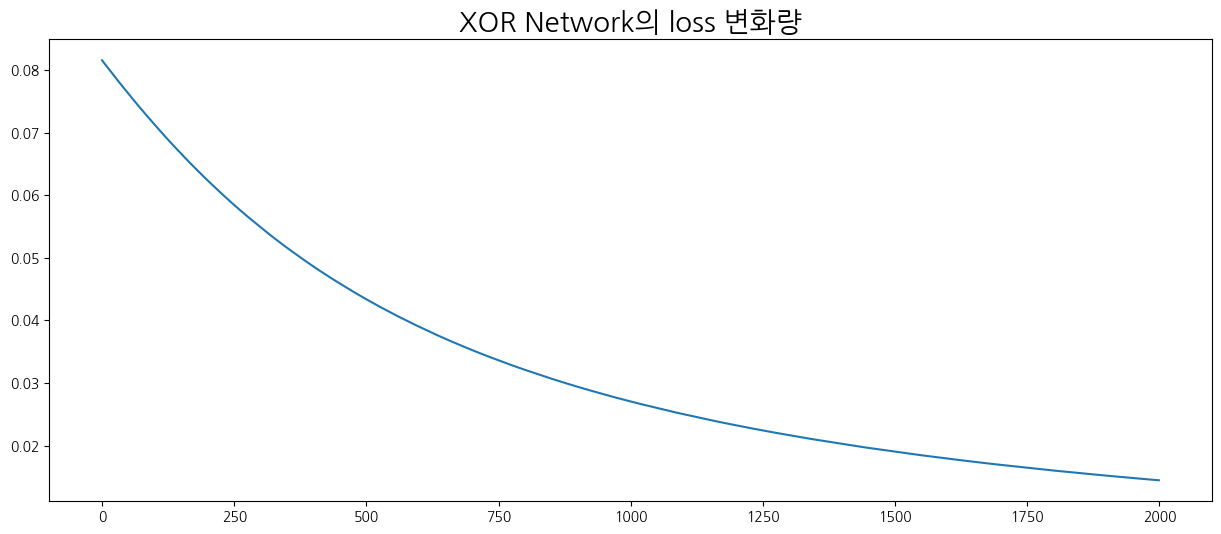

In [24]:
# 딥러닝을 학습시킬 때 가장 많이 보게 될 그래프는 바로 학습이 잘 되고 있는지 확인하기 위한 측정치(metric)의 
# 변화량을 나타내는 선 그래프이다. 선 그래프를 이용해서 손실이 어떻게 변했는지 알아보자.

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 6)
plt.plot(history.history['loss'])
plt.title(label='XOR Network의 loss 변화량', fontdict={'size':20})
plt.show()